**IMPORTING THE DATA**

In [1]:
import pandas as pd

In [3]:
import os 

In [34]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [35]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [38]:
#'https://drive.google.com/file/d/1OWaPGgUncUvxRSq0WvZbSeH9nMoPX4Dg/view?usp=sharing'
fileDownloaded = drive.CreateFile({'id':'1OWaPGgUncUvxRSq0WvZbSeH9nMoPX4Dg'})

In [39]:
fileDownloaded.GetContentFile('merged_data.dta')

In [53]:
df = pd.read_stata('merged_data.dta')

The data was taken from 2 different sources: 
Crime Data: 'https://worldpopulationreview.com/country-rankings/crime-rate-by-country'

Diversity Data: 'https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/4JQRCL/GZLWGZ&version=2.0'

They were manipulated and merged in stata, I will link the do files below. 

In [64]:
from locale import D_FMT
x = df['Country'].values
y1 = df[df.columns[1]]
y2 = df[df.columns[2]]

In [58]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

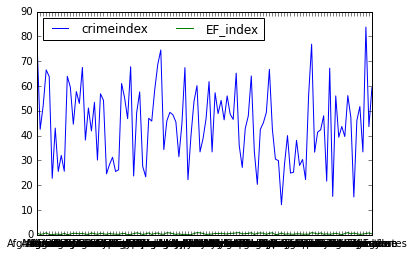

In [67]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(df.columns[1:], ncol=2, loc='upper left');

In [68]:
import seaborn as sns
sns.set()

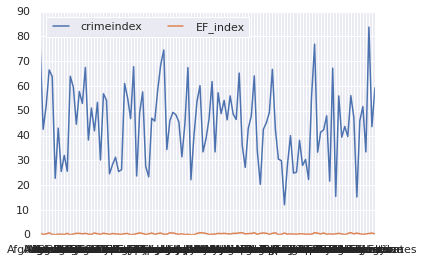

In [69]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(df.columns[1:], ncol=2, loc='upper left');

**REGRESSION**

In [94]:
df.columns = ['Country', 'Crime Index', 'Ethnic Fractionalization Index']

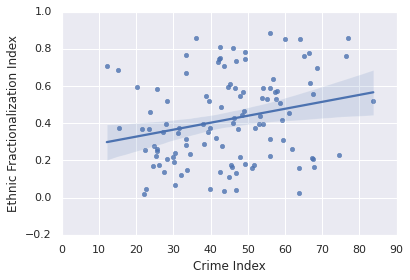

In [98]:
final_regression = sns.regplot(x='Crime Index',y='Ethnic Fractionalization Index',data=df)

In [99]:
from scipy.stats import linregress

In [100]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=df.dropna()['Crime Index'], y=df.dropna()['Ethnic Fractionalization Index'])

In [101]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.0  * x +  0.25
R² =  0.06


In [102]:
np.corrcoef(df.dropna()['Crime Index'], df.dropna()['Ethnic Fractionalization Index'])

array([[1.        , 0.24399543],
       [0.24399543, 1.        ]])

In [103]:
rvalue

0.24399542824209322

In [104]:
fig = final_regression.get_figure()

In [105]:
fig.savefig("ef_crime_regression.png")